In [26]:
#Imports
import pandas as pandas
import xml.etree.ElementTree as ElementTree
import matplotlib.pyplot as plt

In [27]:
#Base Params
stepsPerSec = 10

COLOR = 'black'         #lightGray
BACKGROUND = "none"     #black
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['axes.facecolor'] = BACKGROUND
plt.rcParams['figure.facecolor'] = BACKGROUND

## Importing base emission values to dfBase

In [5]:
xmlDataBase = open('./emissionBaseValues_Bckp.xml', 'r').read()  # Read file
rootBase = ElementTree.XML(xmlDataBase)  # Parse XML

colsBase = []
dataBase = []
for i in rootBase:
    line = []
    for fuelInfo in i:
        # print(i.attrib["time"] + " " + fuelinfo.attrib["id"] + " " + str(fuelinfo.attrib["fuel"]))
        line.append(float(fuelInfo.attrib["fuel"]) / stepsPerSec)

        if (fuelInfo.attrib["id"] not in colsBase):
            colsBase.append(fuelInfo.attrib["id"])
    dataBase.append(line)

dfBase = pandas.DataFrame(dataBase)
dfBase.columns = colsBase
# print(dfBase)


#### Total consumption of each car

Text(0.5, 1.0, 'Total consumption of each car')

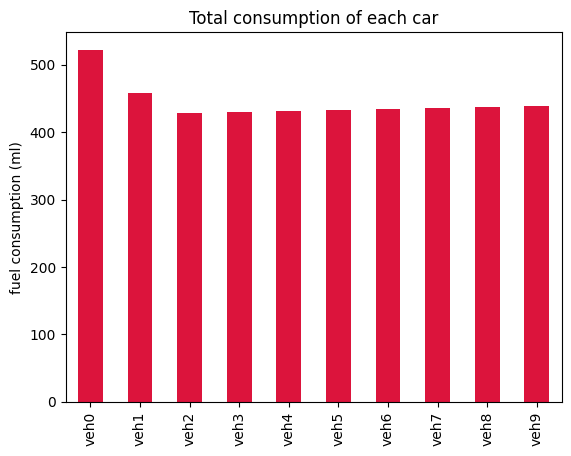

In [6]:
baseSum = dfBase.sum(0)
# print(summed)
baseSum.plot(kind="bar", color="crimson")
plt.ylabel("fuel consumption (ml)")
plt.title("Total consumption of each car")

## Importing emission scaling values to dfScale

In [7]:
xmlDataScale = open("./emissionScaleValues_Bckp.xml", "r").read()
rootScale = ElementTree.XML(xmlDataScale)

colsScale = []
dataScale = []
for i in rootScale:
    line = []
    for scaleInfo in i:
        line.append(float(scaleInfo.attrib["scaling"]))

        if (scaleInfo.attrib["id"] not in colsScale):
            colsScale.append(scaleInfo.attrib["id"])
    dataScale.append(line)
dfScale = pandas.DataFrame(dataScale)
dfScale.columns = colsScale
# print(dfScale)

#### Total scaling values of each car

<AxesSubplot: >

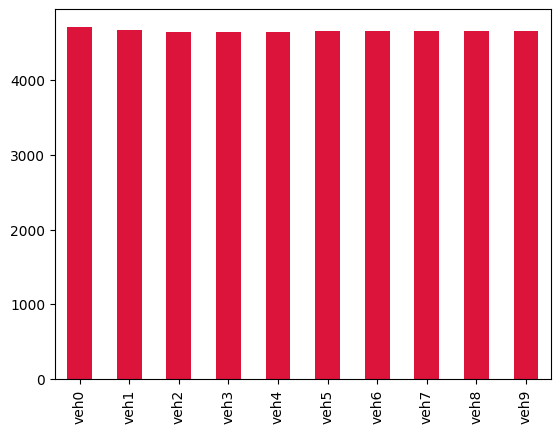

In [8]:
scaledSum = dfScale.sum(0)
# print(scaledSum)
scaledSum.plot(kind="bar", color="crimson")

## Scaling base consumptions for simulated savings

In [9]:
vehicles = dfBase.columns
rowsBase = len(dfBase.index)
rowsScale = len(dfScale.index)
rowsSmaller = rowsBase if rowsBase < rowsScale else rowsScale

dataBaseScaled = []

for i in range(rowsSmaller):
    line = []
    for veh in vehicles:
        b = dfBase[veh][i]
        s = dfScale[veh][i]
        bsd = b*s
        line.append(bsd)
    dataBaseScaled.append(line)

dfBaseScaled = pandas.DataFrame(dataBaseScaled, columns=vehicles)

#### Total consumed fuel of each car (controlled, ml)

veh0    479.08960
veh1    420.75900
veh2    389.06830
veh3    390.21000
veh4    391.34475
veh5    392.69200
veh6    393.82335
veh7    394.95725
veh8    396.29005
veh9    397.41460
dtype: float64


Text(0.5, 1.0, 'Scaled total consumption of controlled cars')

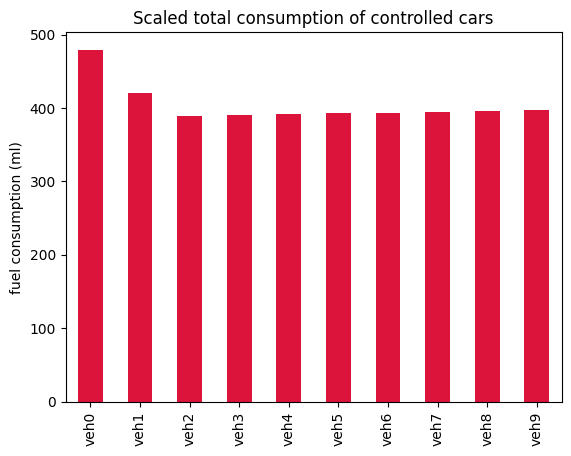

In [10]:
baseScaledSum = dfBaseScaled.sum(0)
print(baseScaledSum)
baseScaledSum.plot(kind="bar", color="crimson")
plt.ylabel("fuel consumption (ml)")
plt.title("Scaled total consumption of controlled cars")

## Importing emission values of uncontrolled cars 

In [11]:
xmlDataUnc = open('./emissionBaseValues_Uncontrolled_Bckp.xml', 'r').read()  # Read file
rootUnc = ElementTree.XML(xmlDataUnc)  # Parse XML

colsUnc = []
dataUnc = []
for i in rootUnc:
    line = []
    for fuelInfo in i:
        # print(i.attrib["time"] + " " + fuelinfo.attrib["id"] + " " + str(fuelinfo.attrib["fuel"]))
        line.append(float(fuelInfo.attrib["fuel"]) / stepsPerSec)

        if (fuelInfo.attrib["id"] not in colsUnc):
            colsUnc.append(fuelInfo.attrib["id"])
    dataUnc.append(line)

dfUnc = pandas.DataFrame(dataUnc)
dfUnc.columns = colsUnc

#### Total consumed fuel of each car (uncontrolled, ml)

Text(0.5, 1.0, 'Total consumption uncontrolled cars')

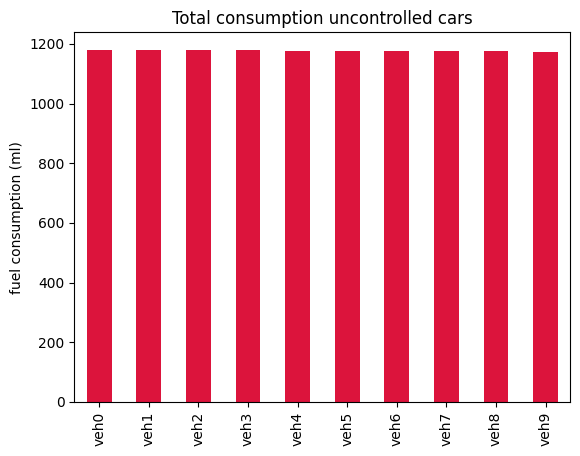

In [12]:
uncSum = dfUnc.sum(0)
# print(summed)
uncSum.plot(kind="bar", color="crimson")
plt.ylabel("fuel consumption (ml)")
plt.title("Total consumption uncontrolled cars")
# ax = plt.gca()
# ax.set_facecolor('xkcd:salmon')

# Function for reading in, calculating and printing fuel consumption

In [28]:
def readCalculateAndPrintFuelConsumption(baseValuesFile, scalingValuesFile, plotName, stepsInOneSec):
    
    # Reading in base values
    baseValuesFileWithPath = './simulationResults_Backup_With1000StepsAndChangeEvery50StepAt30Speed/' + baseValuesFile
    baseDataAsXml = open(baseValuesFileWithPath, 'r').read()
    rootBaseValues = ElementTree.XML(baseDataAsXml)

    baseColumns = []
    baseData = []
    for i in rootBaseValues:
        line = []
        for fuelInfo in i:
            line.append(float(fuelInfo.attrib["fuel"]) / stepsInOneSec)

            if (fuelInfo.attrib["id"] not in baseColumns):
                baseColumns.append(fuelInfo.attrib["id"])
        baseData.append(line)
    
    baseDataFrame = pandas.DataFrame(baseData)
    baseDataFrame.columns = baseColumns

    # Reading in scaled values
    scalingValuesFileWithPath = './simulationResults_Backup_With1000StepsAndChangeEvery50StepAt30Speed/' + scalingValuesFile
    scalingDataAsXml = open(scalingValuesFileWithPath, "r").read()
    rootScalingValues = ElementTree.XML(scalingDataAsXml)

    scalingColumns = []
    scalingData = []
    for i in rootScalingValues:
        line = []
        for scalingInfo in i:
            line.append(float(scalingInfo.attrib["scaling"]))

            if (scalingInfo.attrib["id"] not in scalingColumns):
                scalingColumns.append(scalingInfo.attrib["id"])
        scalingData.append(line)
    
    scalingDataFrame = pandas.DataFrame(scalingData)
    scalingDataFrame.columns = scalingColumns

    vehicles = baseDataFrame.columns
    rowsInBase = len(baseDataFrame.index)
    rowsInScaling = len(scalingDataFrame.index)

    rowsInSmaller = rowsInBase if rowsInBase < rowsInScaling else rowsInScaling

    scaledData = []

    for i in range(rowsInSmaller):
        line = []
        for veh in vehicles:
            base = baseDataFrame[veh][i]
            scaling = scalingDataFrame[veh][i]
            scaled = base*scaling
            line.append(scaled)
        scaledData.append(line)

    scaledDataFrame = pandas.DataFrame(scaledData, columns = vehicles)

    scaledValuesSum = scaledDataFrame.sum(0)
    print(scaledValuesSum)
    scaledValuesSum.plot(kind = "bar", color = "crimson")
    plt.ylabel("fuel consumption (ml)")
    plt.title(plotName)

veh0    461069.1708
veh1    461064.2896
veh2    461210.1570
veh3    461074.8006
veh4    461080.0908
veh5    461085.4152
veh6    461090.7396
veh7    461236.7052
veh8    461110.8456
veh9    458768.5044
dtype: float64


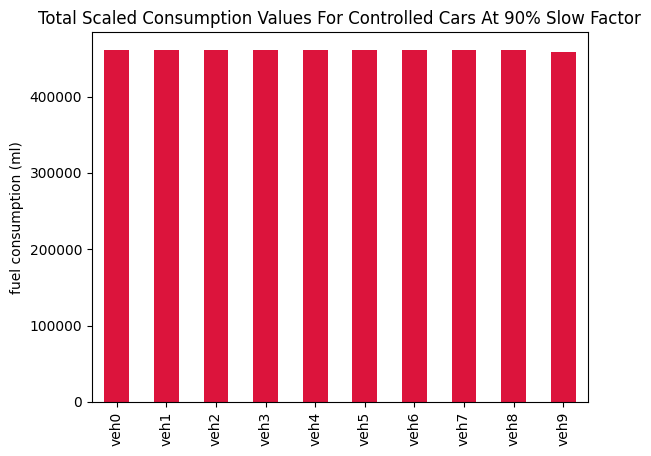

In [33]:
readCalculateAndPrintFuelConsumption(
    "emissionBaseValues_Controlled_SlowFactorAt_90_Percentage.xml",
    "emissionScalingValues_Controlled_SlowFactorAt_90_Percentage.xml",
    "Total Scaled Consumption Values For Controlled Cars At 90% Slow Factor",
    5
)

veh0    501520.284
veh1    501520.284
veh2    501520.284
veh3    501520.284
veh4    501520.284
veh5    501520.284
veh6    501520.284
veh7    501520.284
veh8    501520.284
veh9    501520.284
dtype: float64


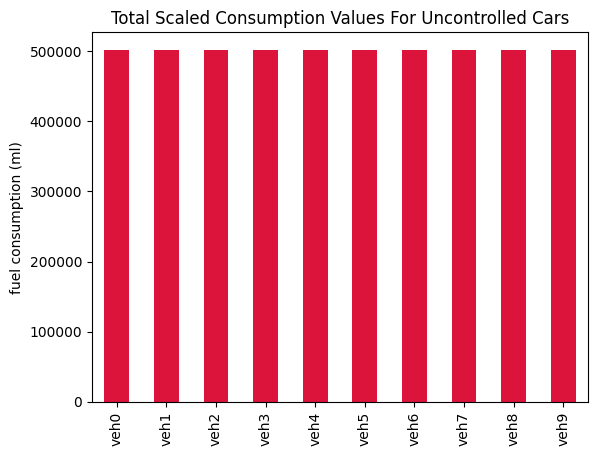

In [34]:
readCalculateAndPrintFuelConsumption(
    "emissionBaseValues_Uncontrolled.xml",
    "emissionScalingValues_Uncontrolled.xml",
    "Total Scaled Consumption Values For Uncontrolled Cars",
    5
)